In [48]:
# GET THE FAST_TEXT words: https://www.kaggle.com/datasets/takaishikawa/fasttext-pretrained-crawl-vector-en-bin 
# It is not small: 4G!!!
#
## REPO
## https://github.com/mulefish/notebooks/blob/main/phylogram.ipynb


In [50]:
import json
import pandas as pd
import numpy as np
import fasttext
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

print("Imports are ok")



Imports are ok


In [51]:

# List of pretend products
product_descriptions = ['This is a baseball cap made of cotton with an adjustable strap.',
                        'This is a fedora made of wool with a wide brim and a ribbon band.',
                        'This is a beanie made of acrylic with a pom-pom on top.',
                        'This is a cowboy hat made of leather with a curved brim and a chin strap.',
                        'This is a visor made of polyester with an elastic band.',
                        'This is a bucket hat made of denim with a flat top and a floppy brim.',
                        'This is a top hat made of silk with a tall cylindrical crown and a wide flat brim.']

# fasttext.util.download_model('en', if_exists='ignore')  # English
model = fasttext.load_model('/Users/pmontgomery/FAST_TEXT_WORDS/cc.en.300.bin')
print("Loaded the model ( Wait till this is done before the next step - might take some time )")


Loaded the model ( Wait till this is done before the next step - might take some time )


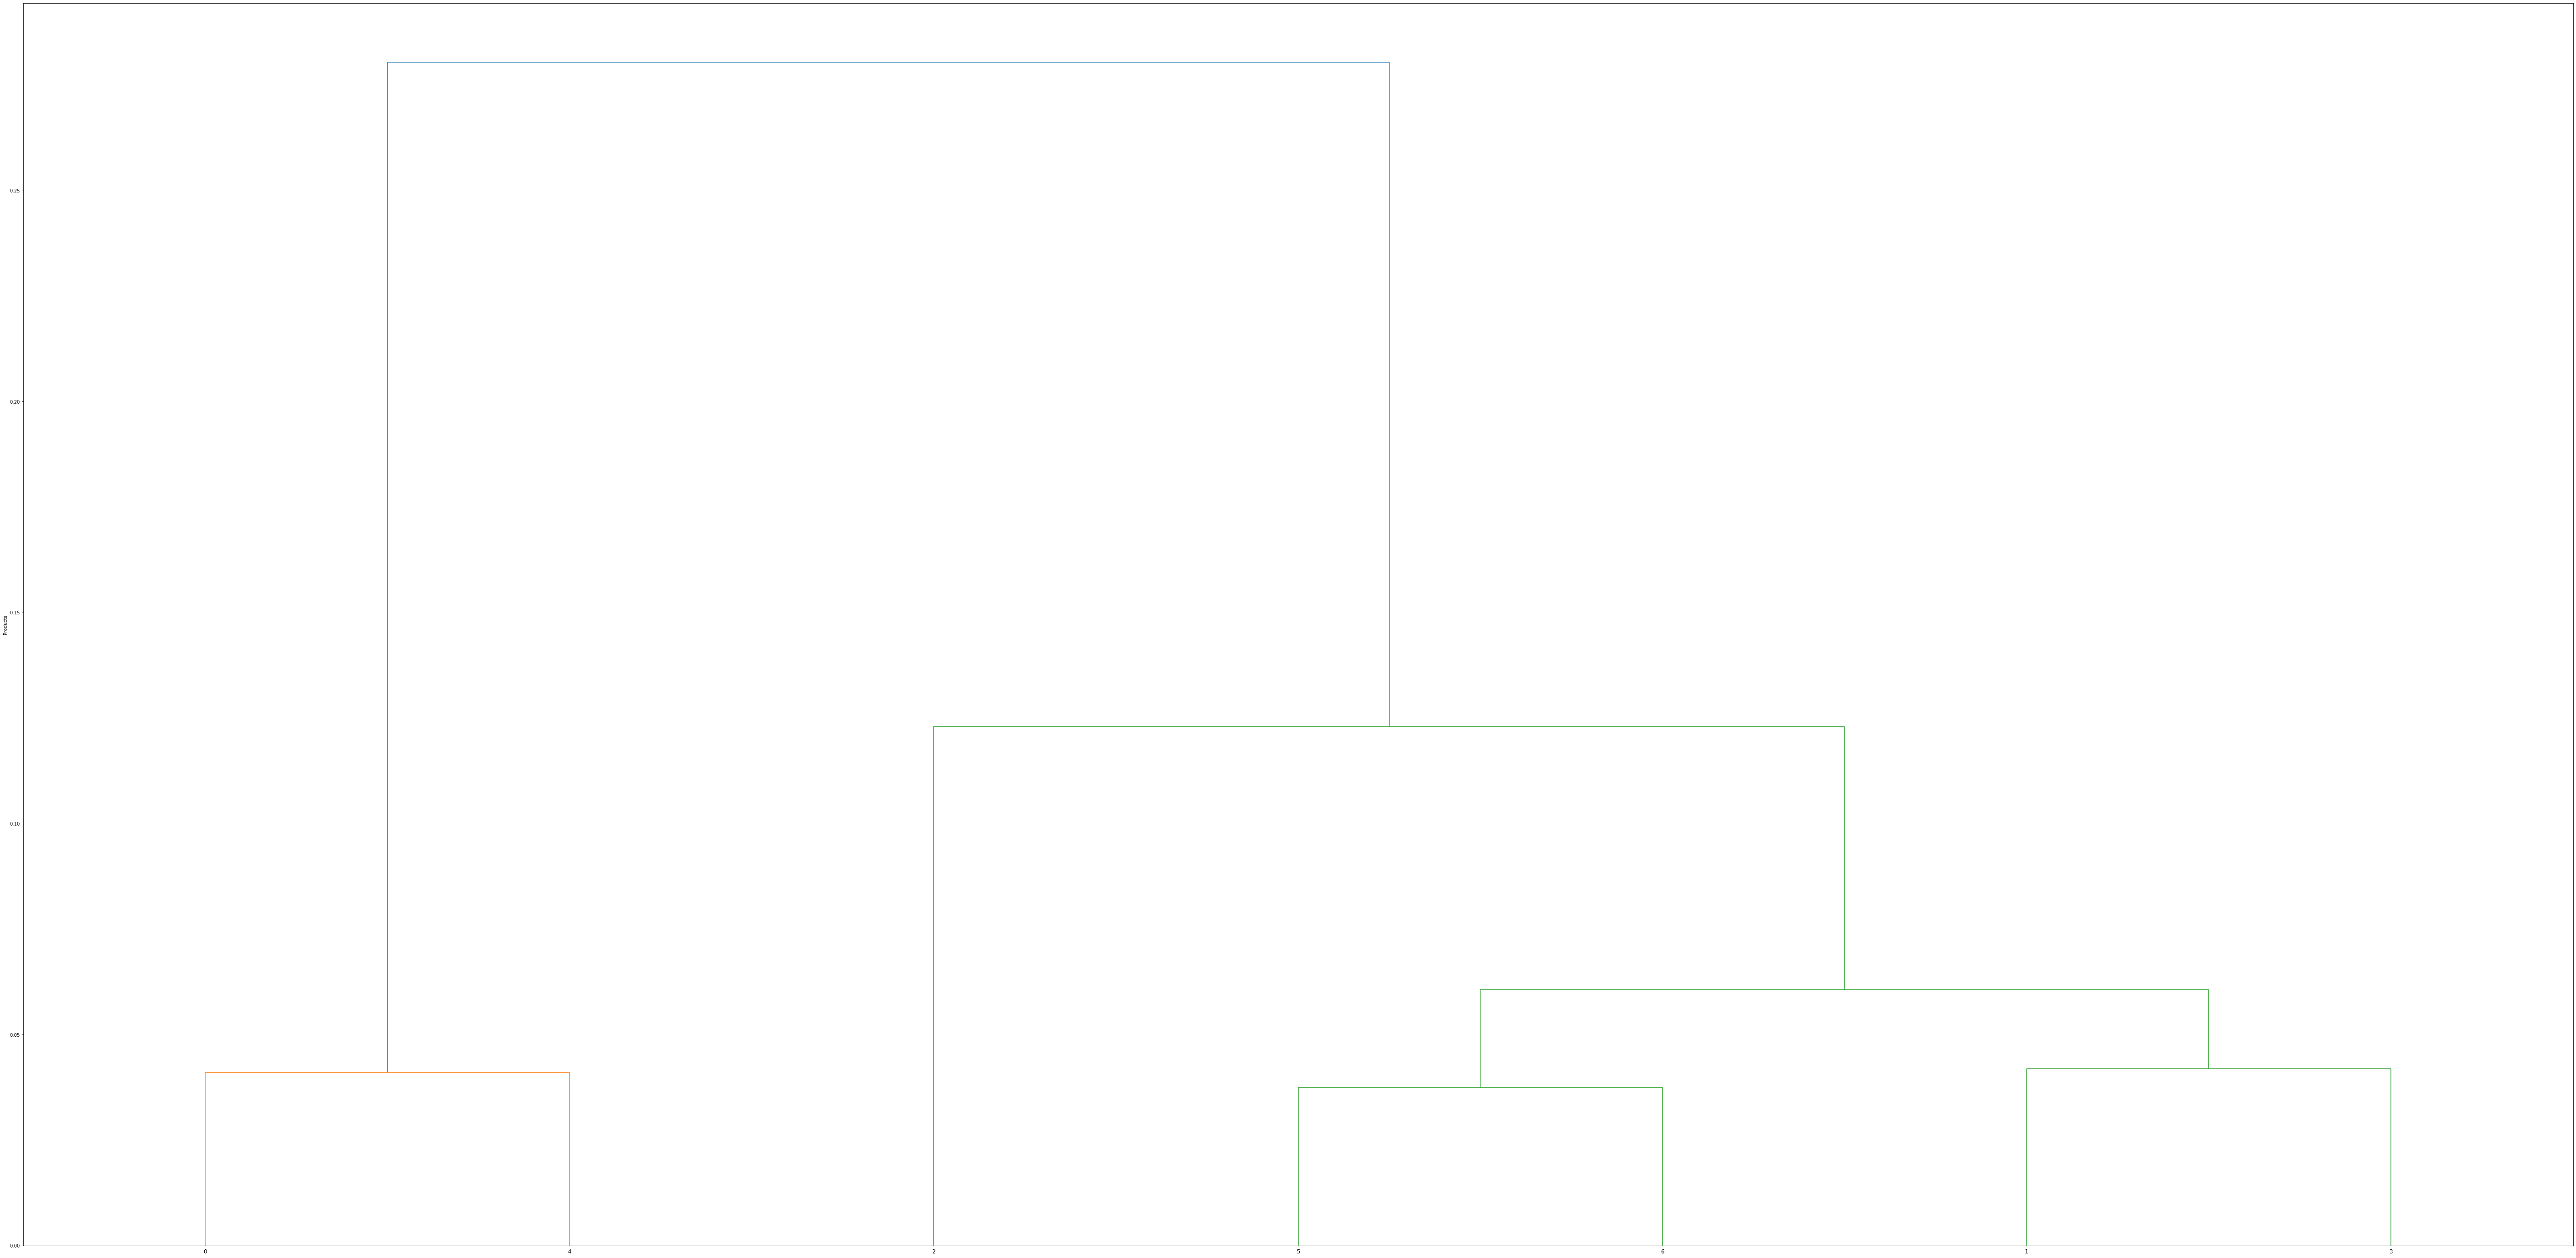

In [52]:

# Embed the product descriptions as vectors
vectors = []
for text in product_descriptions:
    vector = np.mean([model.get_word_vector(word.lower()) for word in text.split()], axis=0)
    vectors.append(vector)

# Calculate cosine similarities between vectors
similarity_matrix = cosine_similarity(vectors)

# Perform hierarchical clustering
Z = linkage(similarity_matrix, method='ward')
# phylogentic or dendrogram? I am unclear the differences
plt.figure(figsize=(100, 50))

### use this to show what descriptions, but, know that the generated graph gets pretty busy pretty quickly
#dendrogram(Z, labels=product_descriptions, orientation='left', leaf_font_size=8)

# use this to show the graph w/o any descriptions. Clean but pointless :) 
dendrogram(Z, orientation='top')
plt.ylabel('Products')
plt.show()

In [54]:
# Convert hierarchical clustering data to JSON
# To be used for by a D3 page to display. 
def create_node(index):
    if index < len(product_descriptions):
        return {'name': product_descriptions[index]}
    else:
        left = int(Z[index-len(product_descriptions), 0])
        right = int(Z[index-len(product_descriptions), 1])
        return {'children': [create_node(left), create_node(right)], 'distance': float(Z[index-len(product_descriptions), 2])}
        
root = create_node(len(product_descriptions) * 2 - 2)
output = json.dumps(root) # output = JSON.stringify(root)
fileToWriteTo = 'output_phylogeny.json'
with open(fileToWriteTo, 'w') as f:
    f.write(output)
# print(output)
print(f"The file {fileToWriteTo} carries the output of this")


The file output_phylogeny.json carries the output of this
